**Import libraries**

In [24]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from datetime import datetime
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statistics as st
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.simplefilter('ignore')

## **A1 on IBM dataset**

In [25]:
#download data
ibm = pdr.DataReader('IBM', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))

In [26]:
ibm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-08-01,191.500000,188.860001,190.500000,189.149994,5181100.0,143.561371
2014-08-04,189.949997,188.600006,189.350006,189.639999,2125900.0,143.933304
2014-08-05,189.199997,186.440002,188.750000,187.100006,3307900.0,142.005493
2014-08-06,186.880005,184.440002,185.360001,185.970001,3847000.0,141.982544
2014-08-07,186.679993,183.580002,186.639999,184.300003,2708600.0,140.707535


In [27]:
#export and save as csv files
ibm.to_csv('IBM_stock.csv', sep=',')

In [28]:
#Dataset Information 
ibm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 589 entries, 2014-08-01 to 2016-11-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       589 non-null    float64
 1   Low        589 non-null    float64
 2   Open       589 non-null    float64
 3   Close      589 non-null    float64
 4   Volume     589 non-null    float64
 5   Adj Close  589 non-null    float64
dtypes: float64(6)
memory usage: 32.2 KB


In [29]:
ibm.describe()

,High,Low,Open,Close,Volume,Adj Close
count,589.000000,589.000000,589.000000,589.000000,5.890000e+02,589.000000
mean,157.737182,155.463786,156.583566,156.617402,4.244832e+06,123.461819
std,15.227783,15.364561,15.325756,15.263828,2.246524e+06,10.790073
min,119.660004,116.900002,118.459999,117.849998,1.415800e+06,94.504570
25%,148.649994,146.449997,147.610001,147.889999,2.962400e+06,117.349693
50%,158.369995,155.679993,157.070007,156.949997,3.725400e+06,124.090508
75%,164.000000,161.830002,162.770004,162.880005,4.701400e+06,129.907471
max,195.000000,193.190002,194.539993,194.000000,2.341650e+07,148.113205


From above we can say that there are no outlier present as differance between mean value and avg of 50% of data is considerable.

In [30]:
print("Variance of the Closing price is % s" 
      %(st.variance(ibm['Close']))) 
print("Standard Deviation of Closing Price is % s " 
                % (st.stdev(ibm['Close'])))

Variance of the Closing price is 232.98443561732842
Standard Deviation of Closing Price is 15.2638276856537 


**Data Plot**

Text(0.5, 1.0, 'Original Data')

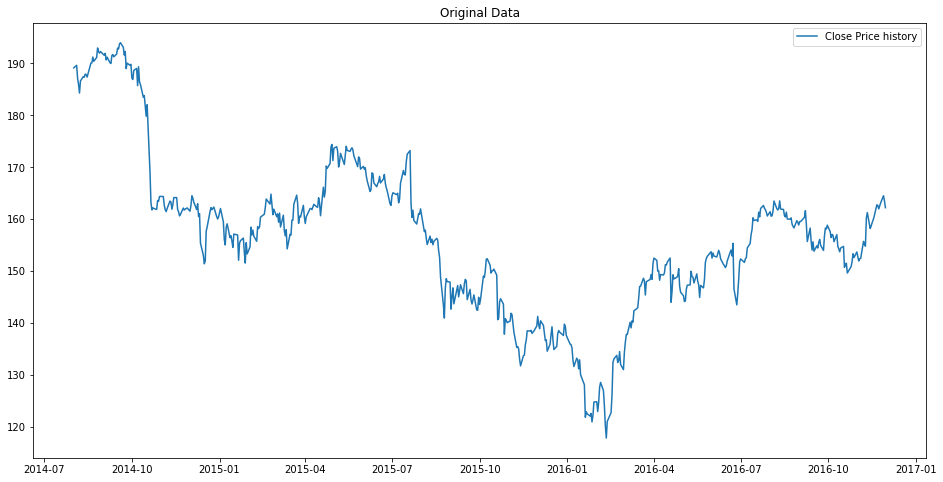

In [31]:
plt.figure(figsize=(16,8))
plt.plot(ibm['Close'], label='Close Price history')
plt.legend()
plt.title('Original Data')

**Decomposition plot to analyse the trend, seasonality present in data.**

<Figure size 432x288 with 0 Axes>

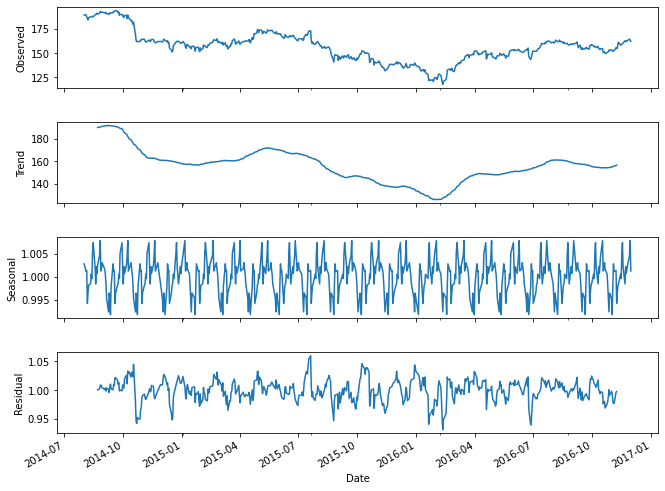

In [32]:
result = seasonal_decompose(ibm["Close"], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(10, 8)

**Daily Return Calculation** 

In [33]:
ibm['Daily Lag'] = ibm['Close'].shift(1)
ibm['Daily Returns'] = (ibm['Daily Lag']/ibm['Close']) -1

(array([  1.,   2.,   3.,   7.,  26.,  55., 102., 150., 119.,  64.,  32.,
         13.,   3.,   4.,   1.,   1.,   0.,   4.,   0.,   1.]),
 array([-0.04794261, -0.04171638, -0.03549016, -0.02926394, -0.02303771,
        -0.01681149, -0.01058526, -0.00435904,  0.00186719,  0.00809341,
         0.01431964,  0.02054586,  0.02677209,  0.03299831,  0.03922454,
         0.04545076,  0.05167698,  0.05790321,  0.06412943,  0.07035566,
         0.07658188]),
 <a list of 20 Patch objects>)

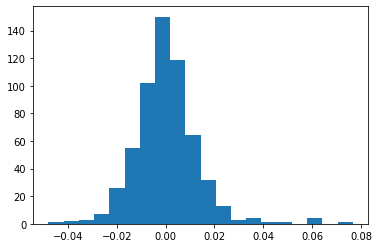

In [34]:
ibm['Daily Returns'].dropna()
plt.hist(ibm['Daily Returns'], bins = 20)

From the above histogram plot, we can see the distribution of the daily returns from the closing price of stock.

**Stationarity Check:**

ADF Test

In [35]:
def adf_test(atr):
    #Perform Dickey-Fuller test:
    timeseries = ibm[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#apply adf test on the series
adf_test('Close')

Results of Dickey-Fuller Test for  Close 

Test Statistic                  -2.279273
p-value                          0.178740
#Lags Used                       0.000000
Number of Observations Used    588.000000
Critical Value (1%)             -3.441520
Critical Value (5%)             -2.866468
Critical Value (10%)            -2.569394
dtype: float64


ADF test: The test statistic is greater than the critical value, so we fail to reject the null hypothesis. So it is non-stationary series. Also P value is greater than 0.05 so, from that also we can say it in non-stationary.

KPSS Test

In [36]:
def kpss_test(atr):
    timeseries = ibm[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('Close')

Results of KPSS Test for  Close
Test Statistic            1.268862
p-value                   0.010000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


KPSS Test: The test statistic is greater than the critical value so we can reject the null hypothesis. So it is non-stationary series.

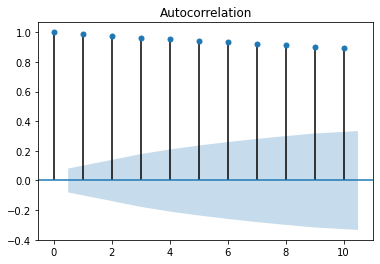

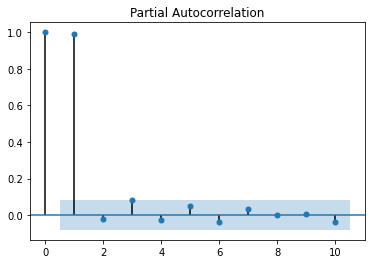

In [37]:
plot_acf(ibm['Close'].dropna(), lags=10)
plt.show()
plot_pacf(ibm['Close'].dropna(), lags=10)
plt.show()

From ACF plot also, we can see that at each lag autocorelation decreasing slowly. So data is non stationary and to make it stationary we can use differencing method. 

Here, I have used simple differencing and plotted the acf,pacf again to see status of stationarity.


In [38]:
ibm['Diff'] = ibm['Close'].diff(periods=1)

Test after differencing

In [39]:
adf_test('Diff')

Results of Dickey-Fuller Test for  Diff 

Test Statistic                -1.843371e+01
p-value                        2.166547e-30
#Lags Used                     1.000000e+00
Number of Observations Used    5.860000e+02
Critical Value (1%)           -3.441558e+00
Critical Value (5%)           -2.866485e+00
Critical Value (10%)          -2.569403e+00
dtype: float64


In [40]:
kpss_test('Diff')

Results of KPSS Test for  Diff
Test Statistic            0.251866
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


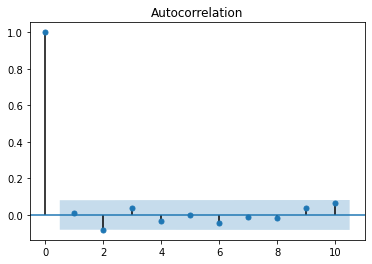

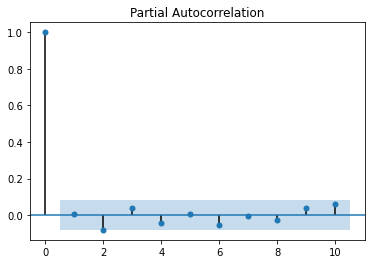

In [41]:
plot_acf(ibm['Diff'].dropna(), lags=10)
plt.show()
plot_pacf(ibm['Diff'].dropna(), lags=10)
plt.show()

So from ADF, KPSS test and also ACF and PACF plot, we can see that data became stationary.

## **A1 on Apple dataset**

In [42]:
#download data
aapl = pdr.DataReader('AAPL', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))

In [43]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-08-01,24.155001,23.702499,23.725000,24.032499,194044000.0,21.657644
2014-08-04,24.145000,23.792500,24.092501,23.897499,159832000.0,21.535982
2014-08-05,23.920000,23.590000,23.840000,23.780001,223732000.0,21.430096
2014-08-06,23.870001,23.677500,23.687500,23.740000,154232000.0,21.394049
2014-08-07,23.987499,23.525000,23.732500,23.620001,186844000.0,21.391787


In [44]:
#export and save as csv files
aapl.to_csv('aapl_stock.csv', sep=',')

In [45]:
#Dataset Information 
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 589 entries, 2014-08-01 to 2016-11-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       589 non-null    float64
 1   Low        589 non-null    float64
 2   Open       589 non-null    float64
 3   Close      589 non-null    float64
 4   Volume     589 non-null    float64
 5   Adj Close  589 non-null    float64
dtypes: float64(6)
memory usage: 32.2 KB


In [46]:
aapl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,589.000000,589.000000,589.000000,589.000000,5.890000e+02,589.000000
mean,27.992016,27.478374,27.743353,27.738748,1.891853e+08,25.586068
std,2.712822,2.695806,2.718831,2.700132,8.425158e+07,2.418740
min,22.917500,22.367500,22.500000,22.584999,4.590360e+07,21.134403
25%,25.547501,25.125000,25.327499,25.330000,1.311576e+08,23.305397
50%,27.969999,27.352501,27.657499,27.610001,1.733648e+08,25.591351
75%,29.807501,29.250000,29.497499,29.570000,2.243016e+08,27.354954
max,33.634998,32.849998,33.615002,33.250000,7.593852e+08,30.384638


From above we can say that there are no outlier present as differance between mean value and avg of 50% of data is considerable.

In [47]:
print("Variance of the Closing price is % s" 
      %(st.variance(aapl['Close']))) 
print("Standard Deviation of Closing Price is % s " 
                % (st.stdev(aapl['Close'])))

Variance of the Closing price is 7.290712375483536
Standard Deviation of Closing Price is 2.700131918163173 


**Data Plot**

Text(0.5, 1.0, 'Original Data')

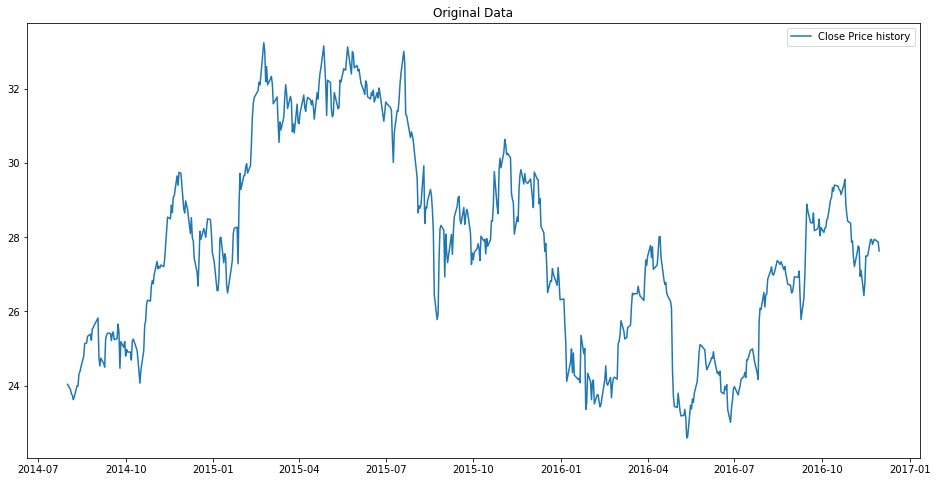

In [48]:
plt.figure(figsize=(16,8))
plt.plot(aapl['Close'], label='Close Price history')
plt.legend()
plt.title('Original Data')

**Decomposition plot to analyse the trend, seasonality present in data.**

<Figure size 432x288 with 0 Axes>

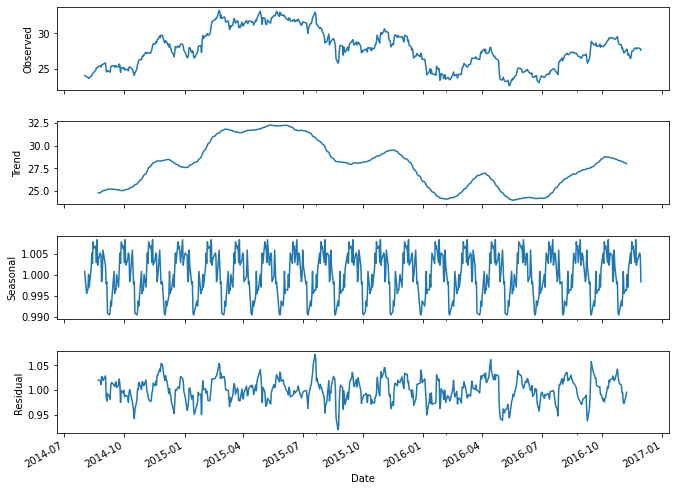

In [49]:
result = seasonal_decompose(aapl["Close"], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(10, 8)

**Daily Return Calculation** 

In [50]:
aapl['Daily Lag'] = aapl['Close'].shift(1)
aapl['Daily Returns'] = (aapl['Daily Lag']/aapl['Close']) -1

(array([  1.,   3.,   0.,   6.,  12.,  17.,  36.,  77., 107., 130.,  97.,
         35.,  32.,  19.,   7.,   1.,   4.,   1.,   0.,   3.]),
 array([-0.06100048, -0.05443407, -0.04786767, -0.04130127, -0.03473487,
        -0.02816847, -0.02160207, -0.01503567, -0.00846926, -0.00190286,
         0.00466354,  0.01122994,  0.01779634,  0.02436274,  0.03092914,
         0.03749554,  0.04406195,  0.05062835,  0.05719475,  0.06376115,
         0.07032755]),
 <a list of 20 Patch objects>)

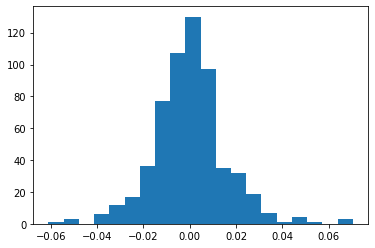

In [51]:
aapl['Daily Returns'].dropna()
plt.hist(aapl['Daily Returns'], bins = 20)

From the above histogram plot, we can see the distribution of the daily returns from the closing price of stock.

**Stationarity Check:**

ADF Test

In [52]:
def adf_test(atr):
    #Perform Dickey-Fuller test:
    timeseries = aapl[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#apply adf test on the series
adf_test('Close')

Results of Dickey-Fuller Test for  Close 

Test Statistic                  -2.170605
p-value                          0.217087
#Lags Used                       0.000000
Number of Observations Used    588.000000
Critical Value (1%)             -3.441520
Critical Value (5%)             -2.866468
Critical Value (10%)            -2.569394
dtype: float64


ADF test: The test statistic is greater than the critical value, so we fail to reject the null hypothesis. So it is non-stationary series. Also P value is greater than 0.05 so, from that also we can say it in non-stationary.

KPSS Test

In [53]:
def kpss_test(atr):
    timeseries = aapl[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('Close')

Results of KPSS Test for  Close
Test Statistic            0.655743
p-value                   0.017569
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


KPSS Test: The test statistic is greater than the critical value so we can reject the null hypothesis. So it is non-stationary series.

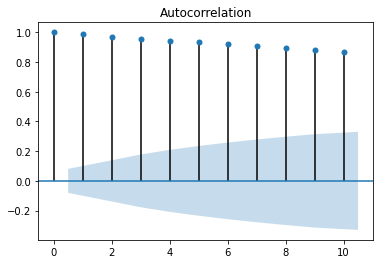

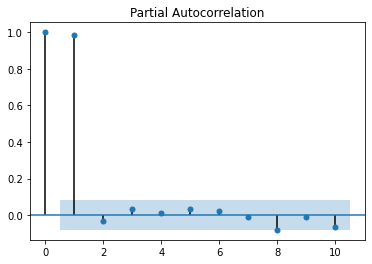

In [54]:
plot_acf(aapl['Close'].dropna(), lags=10)
plt.show()
plot_pacf(aapl['Close'].dropna(), lags=10)
plt.show()

From ACF plot also, we can see that at each lag autocorelation decreasing slowly. So data is non stationary and to make it stationary we can use differencing method. 

Here, I have used simple differencing and plotted the acf,pacf again to see status of stationarity.


In [55]:
aapl['Diff'] = aapl['Close'].diff(periods=1)

Test after differencing

In [56]:
adf_test('Diff')

Results of Dickey-Fuller Test for  Diff 

Test Statistic                 -23.776321
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    587.000000
Critical Value (1%)             -3.441539
Critical Value (5%)             -2.866476
Critical Value (10%)            -2.569399
dtype: float64


In [57]:
kpss_test('Diff')

Results of KPSS Test for  Diff
Test Statistic            0.130863
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


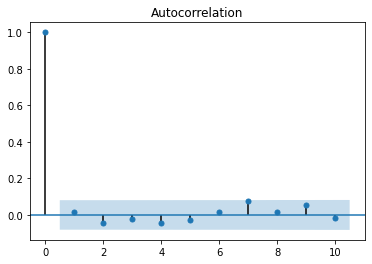

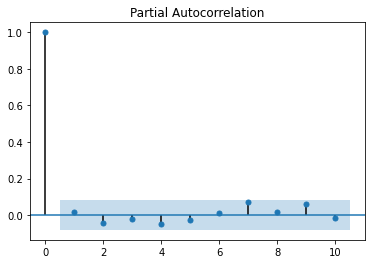

In [58]:
plot_acf(aapl['Diff'].dropna(), lags=10)
plt.show()
plot_pacf(aapl['Diff'].dropna(), lags=10)
plt.show()

So from ADF, KPSS test and also ACF and PACF plot, we can see that data became stationary.

## **A1 on Facebook dataset**

In [60]:
#download data
fb = pdr.DataReader('FB', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))

In [61]:
fb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-08-01,73.220001,71.550003,72.220001,72.360001,43535000,72.360001
2014-08-04,73.879997,72.360001,72.360001,73.510002,30777000,73.510002
2014-08-05,73.589996,72.180000,73.199997,72.690002,34986000,72.690002
2014-08-06,73.720001,71.790001,72.019997,72.470001,30986000,72.470001
2014-08-07,74.000000,72.699997,73.000000,73.169998,38141000,73.169998


In [62]:
#export and save as csv files
fb.to_csv('fb_stock.csv', sep=',')

In [63]:
#Dataset Information 
fb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 589 entries, 2014-08-01 to 2016-11-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       589 non-null    float64
 1   Low        589 non-null    float64
 2   Open       589 non-null    float64
 3   Close      589 non-null    float64
 4   Volume     589 non-null    int64  
 5   Adj Close  589 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 32.2 KB


In [64]:
fb.describe()

,High,Low,Open,Close,Volume,Adj Close
count,589.000000,589.000000,589.000000,589.000000,5.890000e+02,589.000000
mean,98.479779,96.491545,97.527742,97.544160,2.754758e+07,97.544160
std,18.576699,18.438006,18.550756,18.511200,1.396508e+07,18.511200
min,73.220001,70.320000,70.790001,72.360001,5.913100e+06,72.360001
25%,80.000000,78.519997,79.300003,79.330002,1.889710e+07,79.330002
50%,96.099998,93.629997,94.949997,94.970001,2.400390e+07,94.970001
75%,115.010002,113.070000,114.070000,114.190002,3.196100e+07,114.190002
max,133.500000,132.220001,133.500000,133.279999,1.074753e+08,133.279999


From above we can say that there are no outlier present as differance between mean value and avg of 50% of data is considerable.

In [65]:
print("Variance of the Closing price is % s" 
      %(st.variance(fb['Close']))) 
print("Standard Deviation of Closing Price is % s " 
                % (st.stdev(fb['Close'])))

Variance of the Closing price is 342.6645318536038
Standard Deviation of Closing Price is 18.511200173235764 


**Data Plot**

Text(0.5, 1.0, 'Original Data')

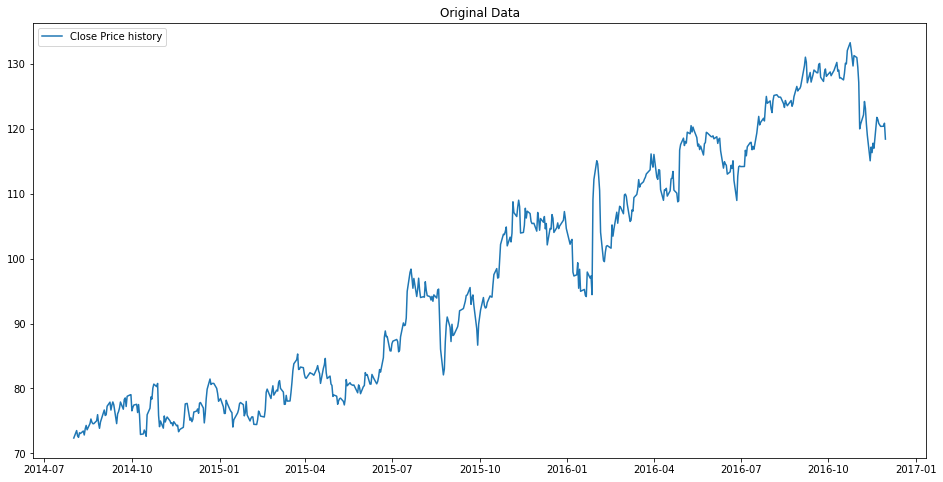

In [66]:
plt.figure(figsize=(16,8))
plt.plot(fb['Close'], label='Close Price history')
plt.legend()
plt.title('Original Data')

**Decomposition plot to analyse the trend, seasonality present in data.**

<Figure size 432x288 with 0 Axes>

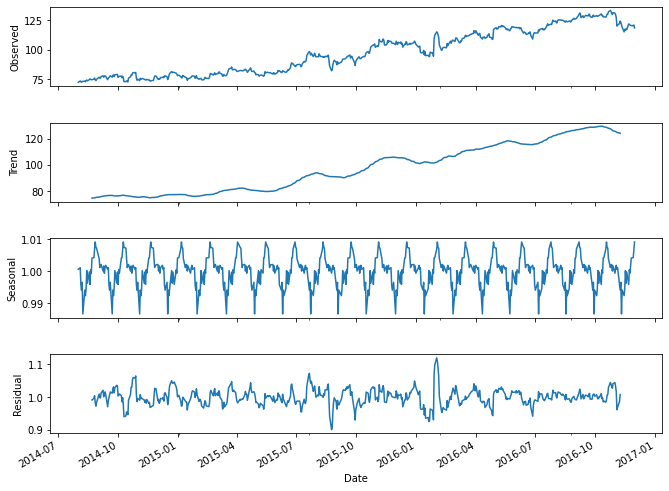

In [67]:
result = seasonal_decompose(fb["Close"], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(10, 8)

**Daily Return Calculation** 

In [68]:
fb['Daily Lag'] = fb['Close'].shift(1)
fb['Daily Returns'] = (fb['Daily Lag']/fb['Close']) -1

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   8.,  17.,
         54., 134., 191., 100.,  44.,  23.,   7.,   4.,   3.]),
 array([-0.13435985, -0.12440564, -0.11445142, -0.10449721, -0.09454299,
        -0.08458878, -0.07463457, -0.06468035, -0.05472614, -0.04477192,
        -0.03481771, -0.02486349, -0.01490928, -0.00495506,  0.00499915,
         0.01495337,  0.02490758,  0.0348618 ,  0.04481601,  0.05477023,
         0.06472444]),
 <a list of 20 Patch objects>)

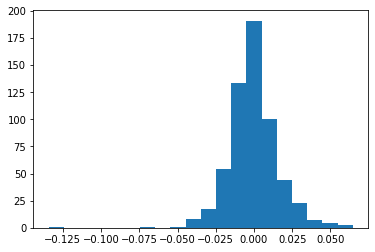

In [69]:
fb['Daily Returns'].dropna()
plt.hist(fb['Daily Returns'], bins = 20)

From the above histogram plot, we can see the distribution of the daily returns from the closing price of stock.

**Stationarity Check:**

ADF Test

In [70]:
def adf_test(atr):
    #Perform Dickey-Fuller test:
    timeseries = fb[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#apply adf test on the series
adf_test('Close')

Results of Dickey-Fuller Test for  Close 

Test Statistic                  -0.966644
p-value                          0.765235
#Lags Used                       6.000000
Number of Observations Used    582.000000
Critical Value (1%)             -3.441636
Critical Value (5%)             -2.866519
Critical Value (10%)            -2.569422
dtype: float64


ADF test: The test statistic is greater than the critical value, so we fail to reject the null hypothesis. So it is non-stationary series. Also P value is greater than 0.05 so, from that also we can say it in non-stationary.

KPSS Test

In [71]:
def kpss_test(atr):
    timeseries = fb[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('Close')

Results of KPSS Test for  Close
Test Statistic            2.941636
p-value                   0.010000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


KPSS Test: The test statistic is greater than the critical value so we can reject the null hypothesis. So it is non-stationary series.

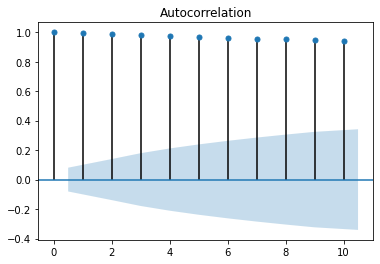

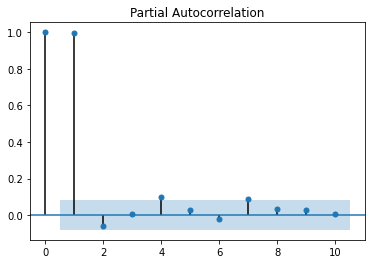

In [72]:
plot_acf(fb['Close'].dropna(), lags=10)
plt.show()
plot_pacf(fb['Close'].dropna(), lags=10)
plt.show()

From ACF plot also, we can see that at each lag autocorelation decreasing slowly. So data is non stationary and to make it stationary we can use differencing method. 

Here, I have used simple differencing and plotted the acf,pacf again to see status of stationarity.


In [73]:
fb['Diff'] = fb['Close'].diff(periods=1)

Test after differencing

In [74]:
adf_test('Diff')

Results of Dickey-Fuller Test for  Diff 

Test Statistic                -1.191784e+01
p-value                        5.114835e-22
#Lags Used                     5.000000e+00
Number of Observations Used    5.820000e+02
Critical Value (1%)           -3.441636e+00
Critical Value (5%)           -2.866519e+00
Critical Value (10%)          -2.569422e+00
dtype: float64


In [75]:
kpss_test('Diff')

Results of KPSS Test for  Diff
Test Statistic            0.058162
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


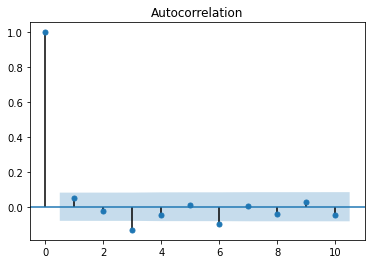

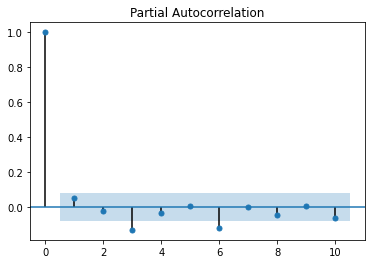

In [76]:
plot_acf(fb['Diff'].dropna(), lags=10)
plt.show()
plot_pacf(fb['Diff'].dropna(), lags=10)
plt.show()

So from ADF, KPSS test and also ACF and PACF plot, we can see that data became stationary.

## **A1 on Google dataset**

In [77]:
#download data
googl = pdr.DataReader('GOOGL', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))

In [78]:
googl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-08-01,583.429993,570.299988,578.549988,573.599976,2213300,573.599976
2014-08-04,583.820007,572.260010,576.510010,582.270020,1519400,582.270020
2014-08-05,580.200012,570.309998,579.380005,573.140015,1643800,573.140015
2014-08-06,578.640015,567.450012,569.500000,574.489990,1322800,574.489990
2014-08-07,578.309998,569.429993,576.049988,571.809998,1163000,571.809998


In [79]:
#export and save as csv files
googl.to_csv('fb_stock.csv', sep=',')

In [80]:
#Dataset Information 
googl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 589 entries, 2014-08-01 to 2016-11-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       589 non-null    float64
 1   Low        589 non-null    float64
 2   Open       589 non-null    float64
 3   Close      589 non-null    float64
 4   Volume     589 non-null    int64  
 5   Adj Close  589 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 32.2 KB


In [81]:
googl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,589.000000,589.000000,589.000000,589.000000,5.890000e+02,589.000000
mean,670.241070,658.717657,664.847572,664.520458,2.059138e+06,664.520458
std,101.589772,100.188867,100.998646,100.889144,1.074884e+06,100.889144
min,500.279999,490.910004,499.239990,497.059998,5.206000e+05,497.059998
25%,561.109985,552.260010,558.000000,556.809998,1.447600e+06,556.809998
50%,692.260010,673.679993,683.729980,681.140015,1.769100e+06,681.140015
75%,763.229980,751.570007,757.520020,757.650024,2.345900e+06,757.650024
max,839.000000,829.039978,838.500000,835.739990,1.285810e+07,835.739990


From above we can say that there are no outlier present as differance between mean value and avg of 50% of data is considerable.

In [82]:
print("Variance of the Closing price is % s" 
      %(st.variance(googl['Close']))) 
print("Standard Deviation of Closing Price is % s " 
                % (st.stdev(googl['Close'])))

Variance of the Closing price is 10178.619326553715
Standard Deviation of Closing Price is 100.88914374973015 


**Data Plot**

Text(0.5, 1.0, 'Original Data')

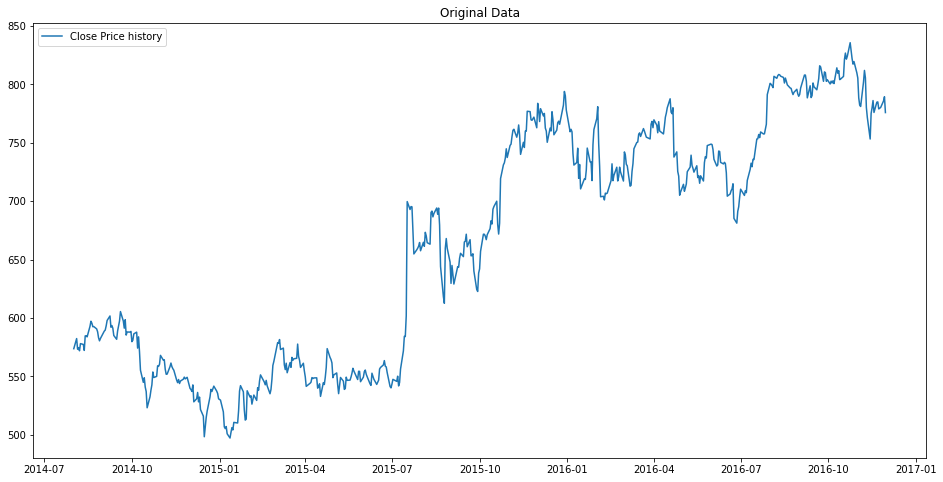

In [83]:
plt.figure(figsize=(16,8))
plt.plot(googl['Close'], label='Close Price history')
plt.legend()
plt.title('Original Data')

**Decomposition plot to analyse the trend, seasonality present in data.**

<Figure size 432x288 with 0 Axes>

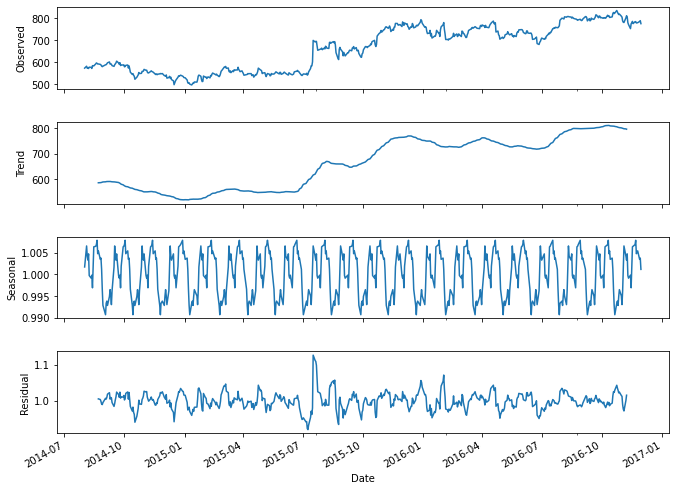

In [84]:
result = seasonal_decompose(googl["Close"], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(10, 8)

**Daily Return Calculation** 

In [85]:
googl['Daily Lag'] = googl['Close'].shift(1)
googl['Daily Returns'] = (googl['Daily Lag']/googl['Close']) -1

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   5.,
         16.,  79., 166., 182.,  87.,  32.,  12.,   3.,   2.]),
 array([-0.1398473 , -0.12999293, -0.12013856, -0.1102842 , -0.10042983,
        -0.09057547, -0.0807211 , -0.07086673, -0.06101237, -0.051158  ,
        -0.04130363, -0.03144927, -0.0215949 , -0.01174053, -0.00188617,
         0.0079682 ,  0.01782257,  0.02767693,  0.0375313 ,  0.04738567,
         0.05724003]),
 <a list of 20 Patch objects>)

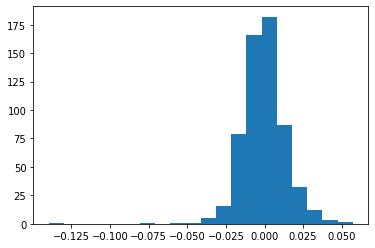

In [86]:
googl['Daily Returns'].dropna()
plt.hist(googl['Daily Returns'], bins = 20)

From the above histogram plot, we can see the distribution of the daily returns from the closing price of stock.

**Stationarity Check:**

ADF Test

In [87]:
def adf_test(atr):
    #Perform Dickey-Fuller test:
    timeseries = googl[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#apply adf test on the series
adf_test('Close')

Results of Dickey-Fuller Test for  Close 

Test Statistic                  -1.092577
p-value                          0.718023
#Lags Used                       3.000000
Number of Observations Used    585.000000
Critical Value (1%)             -3.441578
Critical Value (5%)             -2.866493
Critical Value (10%)            -2.569408
dtype: float64


ADF test: The test statistic is greater than the critical value, so we fail to reject the null hypothesis. So it is non-stationary series. Also P value is greater than 0.05 so, from that also we can say it in non-stationary.

KPSS Test

In [88]:
def kpss_test(atr):
    timeseries = googl[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('Close')

Results of KPSS Test for  Close
Test Statistic            2.648792
p-value                   0.010000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


KPSS Test: The test statistic is greater than the critical value so we can reject the null hypothesis. So it is non-stationary series.

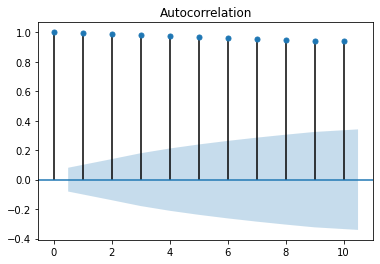

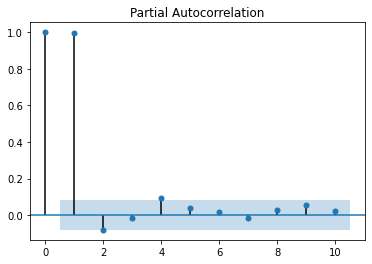

In [89]:
plot_acf(googl['Close'].dropna(), lags=10)
plt.show()
plot_pacf(googl['Close'].dropna(), lags=10)
plt.show()

From ACF plot also, we can see that at each lag autocorelation decreasing slowly. So data is non stationary and to make it stationary we can use differencing method. 

Here, I have used simple differencing and plotted the acf,pacf again to see status of stationarity.


In [90]:
googl['Diff'] = googl['Close'].diff(periods=1)

Test after differencing

In [91]:
adf_test('Diff')

Results of Dickey-Fuller Test for  Diff 

Test Statistic                -1.479016e+01
p-value                        2.177423e-27
#Lags Used                     2.000000e+00
Number of Observations Used    5.850000e+02
Critical Value (1%)           -3.441578e+00
Critical Value (5%)           -2.866493e+00
Critical Value (10%)          -2.569408e+00
dtype: float64


In [92]:
kpss_test('Diff')

Results of KPSS Test for  Diff
Test Statistic            0.073196
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


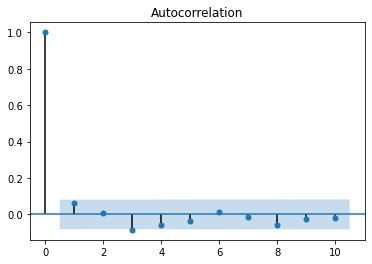

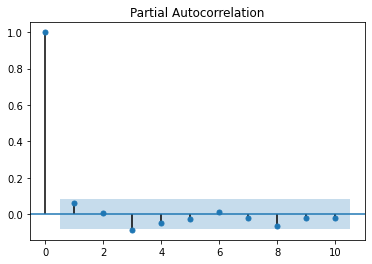

In [93]:
plot_acf(googl['Diff'].dropna(), lags=10)
plt.show()
plot_pacf(googl['Diff'].dropna(), lags=10)
plt.show()

So from ADF, KPSS test and also ACF and PACF plot, we can see that data became stationary.

## **Inference from all 4 dataset**

From the dataplots, decomposition plots and various test (like ADF,KPSS) we can say that all data is non stationary and after doing first differencing it is becoming stationary.  

There is histogram plotted for the daily returns of the stock which showns the distribution of the daily returns. From that we can conclude that In all four dataset of a given period, Daily returns of the IBM data distributed more towards positive side compare to other three.  